In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import sys
from scipy.stats import norm
import scipy.stats as stats
import pylab as pl
from datetime import datetime
#Import belmont csv
belmont = pd.read_csv("belmont.csv", sep = ';', decimal= ",")

In [42]:
# show Belmont Table
belmont


,Year,Winner,Jockey,Trainer,Owner,Time,Miliseconds,Track,miles,Unnamed: 9
0,2016,Creator,"Irad Ortiz, Jr",Steve Asmussen,WinStar Farm LLC,2:28.51,148.51,Belmont,01. Mai,28.0
1,2015,American Pharoah,Victor Espinoza,Bob Baffert,"Zayat Stables, LLC",2:26.65,146.65,Belmont,01. Mai,NaN
2,2014,Tonalist,Joel Rosario,Christophe Clement,Robert S. Evans,2:28.52,148.52,Belmont,01. Mai,NaN
3,2013,Palace Malice,Mike Smith,Todd Pletcher,Dogwood Stable,2:30.70,150.70,Belmont,01. Mai,NaN
4,2012,Union Rags,John Velazquez,Michael Matz,Phyllis M. Wyeth,2:30.42,150.42,Belmont,01. Mai,NaN
...,...,...,...,...,...,...,...,...,...,...
86,1930,Gallant Fox,Earl Sande,Jim Fitzsimmons,Belair Stud,2:31.60,151.60,Belmont,01. Mai,NaN
87,1929,Blue Larkspur,Mack Garner,Herbert J. Thompson,Edward R. Bradley,2:32.80,152.80,Belmont,01. Mai,NaN
88,1928,Vito,Clarence Kummer,Max Hirsch,Alfred H. Cosden,2:33.20,153.20,Belmont,01. Mai,NaN
89,1927,Chance Shot,Earl Sande,Pete Coyne,Joseph E. Widener,2:32.40,152.40,Belmont,01. Mai,NaN


mean 149.21615384615393
standard deviation 1.764350124251631
Outliers_min 144.0
Outliers_max 154.0


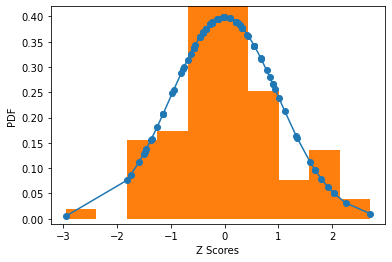

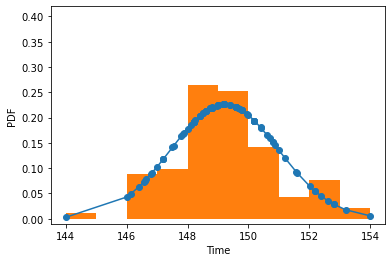

meand, std: 149.22101123595507 1.6186456017743405


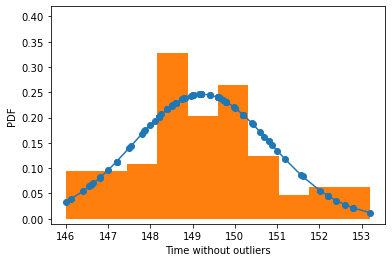

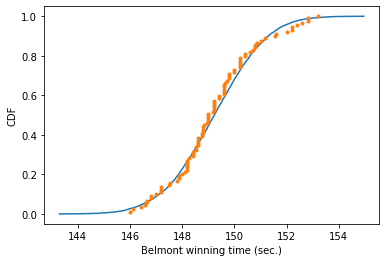

Probability of besting Secretariat: 0.000611


In [12]:
#np.set_printoptions(threshold=sys.maxsize)

#ECDF function
def ecdf(data):
    # number of data points: n
    n = len(data)
    # x-data for the ECDF: x
    x=np.sort(data)
    # y-data for the ECDF: y
    y=np.arange(1, n+1)/n
    return x,y

belmont = pd.read_csv("belmont.csv", sep = ';', decimal= ",") # use delimeters, try to check if all data are available

belmont

# find max value in the column
outlier_max_column = belmont["Time"]
outlier_max = outlier_max_column.max()
outlier_max

Year = belmont["Year"]

belmont["Miliseconds"] = belmont.Miliseconds.astype(float)
Time = belmont["Miliseconds"]
Time


#_ = plt.plot(Time, Year, '.')
#_ = plt.xlabel('belmont time in min')
#_ = plt.ylabel('Year')

mu_mean = np.mean(Time)
sigma_std = np.std(Time)
print('mean', mu_mean)
print('standard deviation', sigma_std)

# calculate Z-scores to find outliers
#Task: calc outliers using another methods see reccomandations

Z_scores = (Time - mu_mean)/sigma_std

Outliers_min = Z_scores.min()
# 1973 and 1970 years should be deleted from analysis

Outliers_max = Z_scores.max()
print('Outliers_min',Outliers_min*sigma_std + mu_mean)
print('Outliers_max', Outliers_max*sigma_std + mu_mean)

h_1 = sorted(Z_scores)  #sorted

fit = stats.norm.pdf(h_1, np.mean(h_1), np.std(h_1))  #this is a fitting indeed

pl.plot(h_1,fit,'-o')

pl.hist(h_1,density=True)      #use this to draw histogram of your data

              
# Make a legend, set limits and show plot
_ = plt.xlabel('Z Scores')
_ = plt.ylabel('PDF')
plt.ylim(-0.01, 0.42)
plt.show()

#Task 1: convert to array and print the whole array, combine two columns Time and Z-scores and Years and print as a table
#Task 2: delete outliers from the Time and print

#print(Time,Z_scores)

#  a normal distribution with outliers
h = sorted(Time)  #sorted

fit = stats.norm.pdf(h, np.mean(h), np.std(h))  #this is a fitting indeed

pl.plot(h,fit,'-o')

pl.hist(h,density=True)      #use this to draw histogram of your data

              
# Make a legend, set limits and show plot
_ = plt.xlabel('Time')
_ = plt.ylabel('PDF')
plt.ylim(-0.01, 0.42)
plt.show()

#a normal distribution without outliers

Time_without = [148.51, 146.65, 148.52, 150.7 , 150.42, 150.88, 151.57, 147.54,
       149.65, 148.74, 147.86, 148.75, 147.5, 148.26, 149.71, 146.56,
       151.19, 147.88, 149.16, 148.82, 148.96, 152.02, 146.82, 149.97,
       146.13, 148.1 , 147.2 , 146, 146.4, 148.2 , 149.8 , 147,
       147.2 , 147.8 , 148.2 , 149.  , 149.8 , 148.6 , 146.8 , 149.6 ,
       149.  , 148.2 , 149.2 , 148.  , 150.4 , 148.8 , 147.2 , 148.8 ,
       149.6 , 148.4 , 148.4 , 150.2 , 148.8 , 149.2 , 149.2 , 148.4 ,
       150.2 , 146.6 , 149.8 , 149.  , 150.8 , 148.6 , 150.2 , 149.  ,
       148.6 , 150.2 , 148.2 , 149.4 , 150.8 , 150.2 , 152.2 , 148.2 ,
       149.2 , 151.  , 149.6 , 149.6 , 149.4 , 148.6 , 150.  , 150.6 ,
       149.2 , 152.6 , 152.8 , 149.6 , 151.6 , 152.8 , 153.2 , 152.4 ,
       152.2 ]
type(Time_without)
# Compute mean and standard deviation: mu, sigma
mu = np.mean(Time_without)
sigma = np.std(Time_without)

print('meand, std:', mu, sigma)

h = sorted(Time_without)  #sorted

fit = stats.norm.pdf(h, np.mean(h), np.std(h))  #this is a fitting indeed

pl.plot(h,fit,'-o')

pl.hist(h,density=True)      #use this to draw histogram of your data

              
# Make a legend, set limits and show plot
_ = plt.xlabel('Time without outliers')
_ = plt.ylabel('PDF')
plt.ylim(-0.01, 0.42)
plt.show()

# Sample out of a normal distribution with this mu and sigma: samples
samples = np.random.normal(mu, sigma, size=10000)

# Get the CDF of the samples and of the data
x_theor, y_theor = ecdf(samples)
x, y = ecdf(Time_without)

# Plot the CDFs and show the plot
_ = plt.plot(x_theor, y_theor)
_ = plt.plot(x, y, marker='.', linestyle='none')
_ = plt.xlabel('Belmont winning time (sec.)')
_ = plt.ylabel('CDF')
plt.show()

# to find out if it is possible to hit Secretariats record
# Take a million samples out of the Normal distribution: samples
samples = np.random.normal(mu, sigma, size=1000000)

# Compute the fraction that are faster than 144 seconds: prob
prob = np.sum(samples <= 144) / len(samples)

# Print the result
print('Probability of besting Secretariat:', prob)


In [13]:
# Time in Milliseconds umrechnen
def timeToMilliseconds(time):
    datetime_from_time = datetime.strptime(time, '%M:%S.%f')
    milliseconds = (datetime_from_time.minute * 60 + datetime_from_time.second) * 1000
    milliseconds = milliseconds + datetime_from_time.microsecond / 1000
    return milliseconds

timeToMilliseconds(belmont['Time'][0])

#%%

#Display of milliseconds
arrString = belmont["Time"].to_numpy()
arrInt = np.empty(arrString.size, dtype=int)
print('Milliseconds')
for x in range(arrString.size):
    arrInt[x] = timeToMilliseconds(arrString[x])
print(arrInt)

Milliseconds
[148510 146650 148520 150700 150420 150880 151570 147540 149650 148740
 147860 148750 147500 148260 149710 146560 151190 147880 149160 148820
 148960 152020 146820 149970 146130 148100 147200 146000 146400 148200
 149800 147000 147200 147800 148200 149000 149800 148600 146800 149600
 149000 148200 149200 144000 148000 150400 154000 148800 147200 148800
 149600 148400 148400 150200 148800 149200 149200 148400 150200 146600
 149800 149000 150800 148600 150200 149000 148600 150200 148200 149400
 150800 150200 152200 148200 149200 151000 149600 149600 149400 148600
 150000 150600 149200 152600 152800 149600 151600 152800 153200 152400
 152200]


In [14]:
# Time in Seconds umrechnen
def timeToSeconds(time):
    datetime_from_time = datetime.strptime(time, '%M:%S.%f')
    Seconds = (datetime_from_time.minute * 60 + datetime_from_time.second)
    return Seconds

timeToSeconds(belmont['Time'][0])

#%%

#Display of milliseconds
arrString = belmont["Time"].to_numpy()
arrInt = np.empty(arrString.size, dtype=int)
print('Seconds')
for x in range(arrString.size):
    arrInt[x] = timeToSeconds(arrString[x])
print(arrInt)

Seconds
[148 146 148 150 150 150 151 147 149 148 147 148 147 148 149 146 151 147
 149 148 148 152 146 149 146 148 147 146 146 148 149 147 147 147 148 149
 149 148 146 149 149 148 149 144 148 150 154 148 147 148 149 148 148 150
 148 149 149 148 150 146 149 149 150 148 150 149 148 150 148 149 150 150
 152 148 149 151 149 149 149 148 150 150 149 152 152 149 151 152 153 152
 152]


In [15]:
def outlier_treatment(datacolumn):
 sorted(datacolumn)
 Q1,Q3 = np.percentile(datacolumn , [25,75])
 IQR = Q3 - Q1
 lower_range = Q1 - (1.5 * IQR)
 upper_range = Q3 + (1.5 * IQR)
 return lower_range,upper_range

In [16]:
#Find Outliers
lowerbound,upperbound = outlier_treatment(arrInt)
(arrInt < lowerbound) | (arrInt > upperbound)
print(arrInt.size)

91


In [17]:
#Delete Outliers
print(arrInt.size)
arrInt = arrInt[(arrInt > lowerbound) & (arrInt < upperbound)]
#arrInt = np.delete(arrInt, np.argwhere((arrInt < lower) | (arrInt > upper)))
print(arrInt.size)
#belmont.drop(belmont["Time": [(arrInt > upperbound) | (arrInt < lowerbound) ].index], inplace=True)

91
88


[148. 149. 150. 152.]


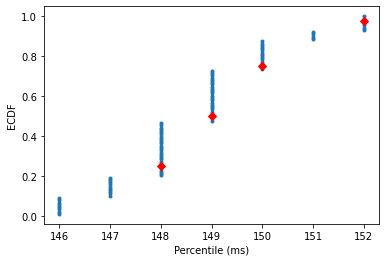

In [18]:
# Specify array of percentiles: percentiles
percentiles = np.array([0.25, 0.5, 0.75, 0.975])

# Compute percentiles: ptiles_vers
percentiles_aar = np.quantile(arrInt, percentiles)

x_aar, y_aar = ecdf(arrInt)

print(percentiles_aar)

#calc percentiles for ecdf of Milliseconds
# Plot the ECDF
_ = plt.plot(x_aar, y_aar, '.')
_ = plt.xlabel('Percentile (ms)')
_ = plt.ylabel('ECDF')

# Overlay percentiles as red x's
_ = plt.plot(percentiles_aar, percentiles, marker='D', color='red',
         linestyle='none')

# Show all on the same  plot
plt.show()

In [20]:
#additional data

# source: https://www.horseracingnation.com/horse/Secretariat
secretariat = pd.read_csv("secretariat.csv", sep = ';')
secretariat

,Date,Horse,Fin,Track,Distance,Sf,Race,Cnd,1st,2nd,3rd,Time
0,10/28/1973,Secretariat,1st,WO,1 5/8 m,T,Canadian International -G1,3+,Secretariat,Big Spruce,Golden Don,2:41.80
1,10/08/1973,Secretariat,1st,Bel,1 1/2m,T,Man O' War Stakes-G1,3+,Secretariat,Tentam,Big Spruce,2:24.80
2,09/29/1973,Secretariat,2nd,Bel,1 1/2m,D,Woodward-G1,3+,Prove Out,Secretariat,Cougar II,2:25.80
3,09/15/1973,Secretariat,1st,Bel,1 1/8 m,D,Marlboro Cup Invitational Handicap-G1,3+,Secretariat,Riva Ridge,Cougar II,1:45.40
4,08/04/1973,Secretariat,2nd,Sar,1 1/8 m,D,Whitney-G2,3+,Onion,Secretariat,Rule By Reason,1:49.20
5,06/30/1973,Secretariat,1st,AP,1 1/8 m,D,Arlington Invitational Stakes-G1,3+,Secretariat,My Gallant,Our Native,1:47.00
6,06/09/1973,Secretariat,1st,Bel,1 1/2m,D,Belmont Stakes-G1,3,Secretariat,Twice A Prince,My Gallant,2:24.00
7,05/19/1973,Secretariat,1st,Pim,1 3/16 m,D,Preakness Stakes-G1,3,Secretariat,Sham,Our Native,1:53.00
8,05/05/1973,Secretariat,1st,CD,1 1/4 m,D,Kentucky Derby-G1,3,Secretariat,Sham,Our Native,1:59.40
9,04/21/1973,Secretariat,3rd,Aqu,1 1/8 m,D,Wood Memorial-G1,3,Angle Light,Sham,Secretariat,1:49.80


In [43]:
# Format the date column
secretariat["Date"] = pd.to_datetime(secretariat["Date"], format='%m/%d/%Y')


# Index könnte ersetzt werden, wenn erst alle nicht Sekretariat Gewinne rausgeworfen werden, danach in Date in richtiges Format bringen und dann in schleife
# starten bei Anfang +1 minus Anfang die diefferenz berrechnen (b-a).days bis Anfang +1 größer als len(secretariat['Date'])
# danach teilen durch len(secretariat['Date'])

# Get all 1st places of secretariat
firstPlacesOfSecretariat = secretariat[secretariat["Fin"] == "1st"]

# Sort by date ascending
firstPlacesOfSecretariat = firstPlacesOfSecretariat.sort_values(by="Date", ascending=True)

# Reset index
firstPlacesOfSecretariat = firstPlacesOfSecretariat.reset_index()

# Create sum of days between races
sumOfDaysBetweenRaces = 0

# Sum up the time periods (days) between won races of secretariat
for key, time in firstPlacesOfSecretariat['Date'].items():
    if (key == 0):
        continue
    
    sumOfDaysBetweenRaces += (time - firstPlacesOfSecretariat['Date'][key - 1]).days

# Calculate the mean of days between won races
meanOfDaysBetweenRaces = sumOfDaysBetweenRaces / len(firstPlacesOfSecretariat)

# Output of the found value
print(f'On average secretariat won a race every {meanOfDaysBetweenRaces} days.')

On average secretariat won a race every 29.375 days.


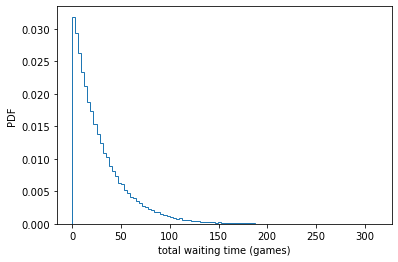

In [44]:
# Draw samples of waiting times
waiting_times = np.random.exponential(meanOfDaysBetweenRaces, size=100000)

# Make the histogram
_ = plt.hist(waiting_times, bins=100, histtype='step',
             density=True)

# Label axes
_ = plt.xlabel('total waiting time (games)')
_ = plt.ylabel('PDF')

# Show the plot
plt.show()

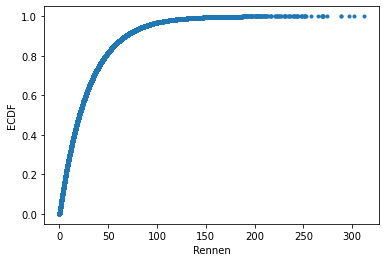

In [45]:
# Generate CDFs
x_std1, y_std1 = ecdf(waiting_times)
# Plot CDFs
_ = plt.plot(x_std1, y_std1, marker='.', linestyle='none')

_ = plt.xlabel('Rennen')
_ = plt.ylabel('ECDF')

plt.show()


In [46]:
# Wahrscheinlichkeit von annähernd 100 % bei 200 Rennen